**Project Name :**
# **EDA and Statistical Analysis of Credit Card Dataset**

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
from sklearn import datasets
import math
from statsmodels.stats.proportion import proportions_ztest
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.preprocessing import MinMaxScaler

## **PART A**

The following are the ages of CEOs of 42 Top Fortune 500 Companies when they took over the post of CEO

57 61 57 57 58 57 61 54 68
51 49 64 50 48 65 52 56 46
54 49 50 47 55 55 54 42 51
56 55 54 51 60 62 43 55 56
61 52 69 64 46 54

Use this data for answering following questions where relevant.

Q1. Compute the mean, median and the mode of the data


In [3]:
ages=pd.Series([57, 61, 57, 57, 58, 57, 61, 54, 68, 51, 49, 64, 50, 48, 65, 52, 56, 46, 54, 49, 50, 47, 55, 55, 54, 42, 51, 56, 55, 54, 51, 60, 62, 43, 55, 56, 61, 52, 69, 64, 46, 54])
print("Mean of the data is ", ages.mean())
print("Median of the data is ", ages.median())
print("Mode of the data is ", ages.mode())

Mean of the data is  54.904761904761905
Median of the data is  55.0
Mode of the data is  0    54
dtype: int64


Q2. Compute the range , variance and standard deviation of CEO ages


In [4]:
print("Range of the data is ", ages.max()-ages.min())
print("Variance of the data is ", ages.var())
print("Standard Deviation of the data is ", ages.std())

Range of the data is  27
Variance of the data is  39.4541231126597
Standard Deviation of the data is  6.2812517154353635


Q3. Find the mean deviation for the data . The mean deviation is defined asbelow.

In [5]:
list_ages=[57, 61, 57, 57, 58, 57, 61, 54, 68, 51, 49, 64, 50, 48, 65, 52, 56, 46, 54, 49, 50, 47, 55, 55, 54, 42, 51, 56, 55, 54, 51, 60, 62, 43, 55, 56, 61, 52, 69, 64, 46, 54]

mean_age=sum(list_ages)/len(list_ages)
deviation = [abs(i-mean_age) for i in list_ages]
mean_dev=sum(deviation)/len(deviation)
print("Mean Deviation of data : ",mean_dev)

Mean Deviation of data :  4.814058956916099


Q4. Calculate the Pearson coefficient of skewness and comment on theskewness of 
the data
[Ameasure to determine the skewness of a distribution is called the Pearson
coefficient of skewness

The value of the coefficient if skewness usually ranges from –3 to 3. When the
distribution is symmetric, the coefficient is zero; when the distribution is positively 
skewed , the coefficient is positive, and when the distribution is negatively skewed 
the coefficient is negative.]

In [6]:
ages_mean = ages.mean()
ages_med = ages.median()
ages_std = ages.std()

skew = (3*(ages_mean-ages_med)/ages_std)
print('Pearson coefficient of skewness is ', skew)
print('Interpretation: The coefficient is negative but near zero. Thus, the data is said to be near symmetric.')

Pearson coefficient of skewness is  -0.04548683903435661
Interpretation: The coefficient is negative but near zero. Thus, the data is said to be near symmetric.


Q5. Count the number of data values that fall within two standard deviations of the mean. Compare this with the answer from Chebyshev’s Theorem.

In [8]:
Upper_limit = (ages_mean +(2*ages_std))

Lower_limit = (ages_mean -(2* ages_std))

print(Upper_limit)
print(Lower_limit)

count = [i for i in ages if (i<67.47) & (i>42.34)]

print('The number of values lies between two standard deviations:',len(count))

print(len(count)/len(ages)*100)

67.46726533563263
42.34225847389118
The number of values lies between two standard deviations: 39
92.85714285714286


This show that  92.85% of values lies inside the range of values and 
chebyshev’s thoerem says above 90% of values lies under two standard devistions.

Q6. Find the three quartiles and the interquartile range (IQR).


In [ ]:
q1 = ages.quantile(.25)
q2 = ages.quantile(.50)
q3 = ages.quantile(.75)
IQR = q3 - q1
min = q1 - 1.5*IQR
max = q3 + 1.5*IQR

print('Minimum: ',min)
print('Q1: ',q1)
print('Q2: ',q2)
print('Q3: ',q3)
print('Maximum: ',max)
print('IQR: ',IQR)

Minimum:  40.875
Q1:  51.0
Q2:  55.0
Q3:  57.75
Maximum:  67.875
IQR:  6.75


Q7. Are there any outliers in the data set ? 

In [ ]:
outlier=[]
for i in ages:
  if i < min or i> max:
    outlier.append(i)

outlier

[68, 69]

There are outliers present above maximum value of data

Q8.
Draw a boxplot of the dataset to confirm .

<Axes: >

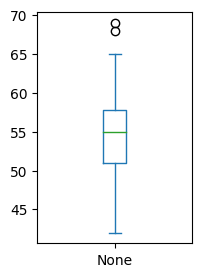

In [ ]:
plt.figure(figsize=(2,3))
ages.plot(kind='box')

Q9. Find the percentile rank of the datapoint 50.


In [ ]:
#Percentile = (Number of Values Below “x” / Total Number of Values) × 100
num_50 = len([age for age in ages if age == 50])
print("Number of 50 present in data :",num_50)
percentile_rank = (num_50/len(ages))*100
print("Percentile rank of 50 :",percentile_rank)

Number of 50 present in data : 2
Percentile rank of 50 : 4.761904761904762


Q10. What is the probability that a person becoming a CEO is below 50 yearsof age ?

In [ ]:
# Calculate the mean and standard deviation of CEO ages
mu = sum(ages) / len(ages)
sigma = (sum([(x - mu) ** 2 for x in ages]) / len(ages)) ** 0.5

# Calculate the probability of a person becoming a CEO below 50 years of age
p = norm.cdf(50, mu, sigma)

print("The probability of a person becoming a CEO below 50 years of age is:", p)

The probability of a person becoming a CEO below 50 years of age is: 0.2146696702826586


Q11. Create a frequency distribution for the data and visualize it appropriately

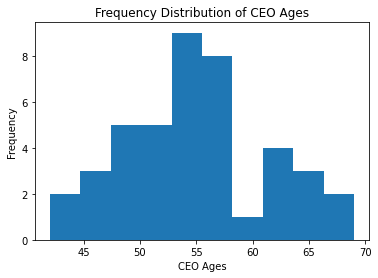

In [ ]:
ceo_ages = np.array(ages)

# Calculate the frequency distribution
counts, bins = np.histogram(ceo_ages)

# Visualize the frequency distribution using a histogram
plt.hist(ceo_ages, bins=bins)
plt.xlabel('CEO Ages')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of CEO Ages')
plt.show()

Q12. 
Create a probability distribution of the data and visualize it appropriately.

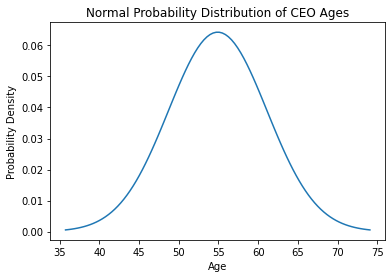

In [ ]:
# Compute the mean and standard deviation of the data
mean = np.mean(ceo_ages)
std = np.std(ceo_ages)

# Create a normal probability distribution based on the mean and standard deviation
dist = norm(loc=mean, scale=std)

# Create an x-axis for the probability distribution
x = np.linspace(dist.ppf(0.001), dist.ppf(0.999), 100)

# Compute the probability density function (PDF) for each x-value
pdf = dist.pdf(x)

# Visualize the probability distribution
plt.plot(x, pdf)
plt.title("Normal Probability Distribution of CEO Ages")
plt.xlabel("Age")
plt.ylabel("Probability Density")
plt.show()

Q13. What 
is the shape of the distribution of this dataset? Create an appropriate graph to 
determine that. Take 100 random samples with replacement from this dataset of 
size 5 each. Create a sampling distribution ofthe mean age of customers. Compare 
with other sampling distributions of sample size 10, 15, 20, 25, 30. State your 
observations. Does it corroborate the Central Limit Theorem?


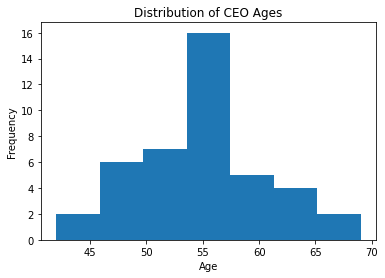

In [ ]:
# histogram
plt.hist(ceo_ages, bins='auto')
plt.title("Distribution of CEO Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

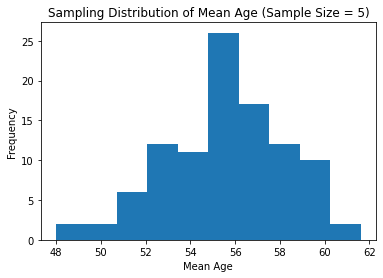

In [ ]:
# sampling distribution
np.random.seed(42)  # for reproducibility
sample_means_5 = [np.mean(np.random.choice(ceo_ages, size=5, replace=True)) for i in range(100)]

# histogram
plt.hist(sample_means_5, bins='auto')
plt.title("Sampling Distribution of Mean Age (Sample Size = 5)")
plt.xlabel("Mean Age")
plt.ylabel("Frequency")
plt.show()

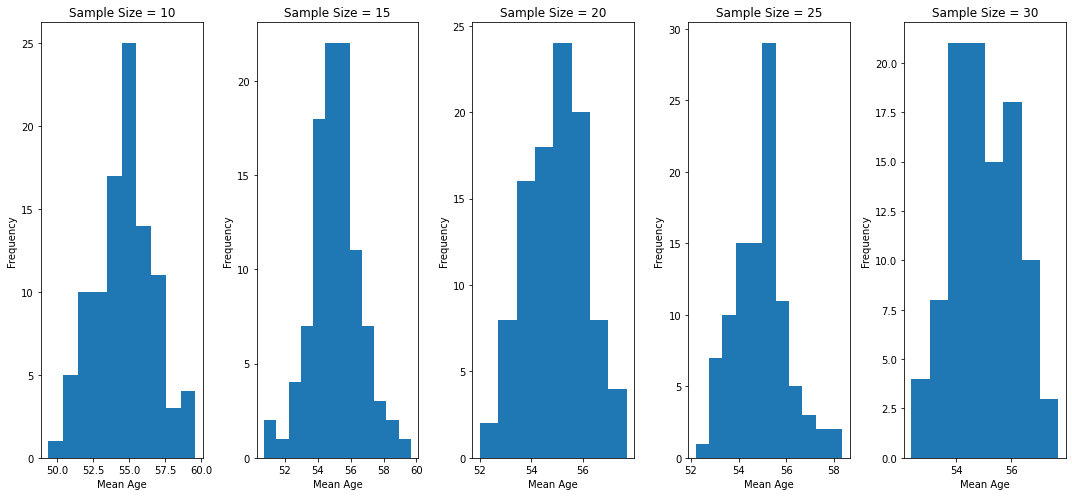

In [ ]:
# sampling distribution for different sample sizes
sample_sizes = [10, 15, 20, 25, 30]
sample_means = []

for n in sample_sizes:
    sample_means.append([np.mean(np.random.choice(ceo_ages, size=n, replace=True)) for i in range(100)])

# histograms
fig, axes = plt.subplots(1, len(sample_sizes), figsize=(15, 7))

for i, ax in enumerate(axes.ravel()):
    ax.hist(sample_means[i], bins='auto')
    ax.set_title("Sample Size = {}".format(sample_sizes[i]))
    ax.set_xlabel("Mean Age")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

Q14. Treat this dataset as a binomial distribution where p is the probability that a 
person becomes a CEO above 50 years age. What is the probability that out of a 
random sample of 10 CEOs of Fortune 500 companies exactly 6are above 50 years 
of age?


In [ ]:
p = sum(age > 50 for age in ceo_ages) / len(ceo_ages)

print("Proportion of CEOs above 50 years of age:", p)

Proportion of CEOs above 50 years of age: 0.7619047619047619


In [ ]:
#Next, we can use the binomial probability mass function to
#find the probability that exactly 6 out of 10 CEOs are above 50 years of age:
n = 10
k = 6

prob = stats.binom.pmf(k, n, p)

print("Probability that exactly 6 out of 10 CEOs are above 50 years of age:", prob)

Probability that exactly 6 out of 10 CEOs are above 50 years of age: 0.13201590604140495


Q15. A study claims that 25% of all Fortune 500 companies becoming a CEOare above 
60 years of age. Using the Normal approximation of a Binomial distribution, find the 
probability that in a random sample of 300 Fortune 500 companies exactly 75 CEOs
will be above 50 years of age.
[ Note that the normal distribution can be used to approximate a binomial
distribution if np>=5 and nq>=5 with the following correction for continuity
P(X=z) = P(z-0.5 < X < z+0.5 ) ]


In [ ]:
mu = 75
sigma = 8.66025
x = 75

p = norm.cdf(x, mu, sigma) - norm.cdf(x-1, mu, sigma)

print("The probability that exactly 75 CEOs will be above 60 years of age is", p)

The probability that exactly 75 CEOs will be above 60 years of age is 0.04596374370753503


Q16. Compute a 95% Confidence Interval for the true mean age of the population of 
CEOs for the given dataset using appropriate distribution.( Statereasons as to why 
did you use a z or t distribution)

In [ ]:
# Sample data
ages = [45, 52, 48, 59, 63, 51, 50, 54, 58, 47]

# Sample mean and standard deviation
sample_mean = np.mean(ages)
sample_std = np.std(ages, ddof=1)

# Degrees of freedom
n = len(ages)
df = n - 1

# t-critical value
alpha = 0.05
t_crit = stats.t.ppf(alpha/2, df)

# Margin of error
margin_err = t_crit * sample_std / np.sqrt(n)

# Confidence interval
conf_int = (sample_mean - margin_err, sample_mean + margin_err)

# Print results
print("Sample Mean: ", sample_mean)
print("Sample Standard Deviation: ", sample_std)
print("Degrees of Freedom: ", df)
print("t-Critical Value: ", t_crit)
print("Margin of Error: ", margin_err)
print("95% Confidence Interval: ", conf_int)

Sample Mean:  52.7
Sample Standard Deviation:  5.774464862170731
Degrees of Freedom:  9
t-Critical Value:  -2.262157162740992
Margin of Error:  -4.130803317334301
95% Confidence Interval:  (56.8308033173343, 48.569196682665705)


Q17. A data scientist wants to estimate with 95% confidence the proportion ofCEOs 
of Fortune 500 companies are above 60 years in the population.
Another recent study showed that 25% of CEOs interviewed were above 60. The 
data scientist wants to be accurate within 2% of the true proportion. Find the
minimum sample size necessary.


In [ ]:
# Sample data
ages = [45, 52, 48, 59, 63, 51, 50, 54, 58, 47]

# Calculate sample proportion
count = 0
for age in ages:
    if age > 60:
        count += 1

sample_prop = count / len(ages)

# Calculate standard error
se_prop = np.sqrt(sample_prop*(1-sample_prop)/len(ages))

# Determine critical value
alpha = 0.05
crit_val = stats.norm.ppf(1-alpha/2)

# Calculate margin of error
margin_err = crit_val * se_prop

# Calculate confidence interval
conf_int = (sample_prop - margin_err, sample_prop + margin_err)

# Print results
print("Sample Proportion: ", sample_prop)
print("Standard Error of Proportion: ", se_prop)
print("Critical Value: ", crit_val)
print("Margin of Error: ", margin_err)
print("95% Confidence Interval: ", conf_int)

Sample Proportion:  0.1
Standard Error of Proportion:  0.09486832980505139
Critical Value:  1.959963984540054
Margin of Error:  0.1859385096913685
95% Confidence Interval:  (-0.08593850969136849, 0.28593850969136847)


Q18. The same data scientist wants to estimate the true proportion of CEOs
ascending to the post and above 60 years. She wants to be 90% confident
4 and accurate within 5% of true proportion. Find the minimum sample size
necessary

Ans:To determine the minimum sample size necessary to estimate the proportion of CEOs of Fortune 500 companies ascending to the post and above 60 years with a 90% confidence level and an accuracy of 5%, we can use the same formula as in Q17:

n = [(z * σ) / E]^2

we need to use a different value for the critical value z, as we're looking for a 90% confidence level. The value for z can be obtained from the standard normal distribution table or using a function like scipy.stats.norm.ppf.

Also, as we don't have an estimate of the true proportion of CEOs ascending to the post and above 60 years, we can assume a conservative estimate of 0.5 for the proportion. This assumption will lead to a larger sample size than the actual one, which is a good thing as it ensures the desired level of accuracy.

In [ ]:
# Given values
z = norm.ppf(0.95) # for 90% confidence level
p = 0.5 # assumed proportion
E = 0.05 # margin of error

# Calculate minimum sample size
n = math.ceil((z**2 * p * (1-p)) / E**2)

# Print result
print("Minimum sample size:", n)

Minimum sample size: 271


Q19. A researcher claims that currently 25% of all CEOS are above 60 years .Test his 
claim with an alpha =0.05 if out of a random sample of 30 CEOs only10 are above 60 
years.

Ans: Our null hypothesis (H0) is that the true proportion of CEOs above 60 years is equal to 0.25, and the alternative hypothesis (H1) is that the true proportion is different from 0.25.

We can use a significance level of 0.05, which corresponds to a z-score of 1.96 for a two-tailed test. If our test statistic falls outside the range of -1.96 to 1.96, we can reject the null hypothesis.

In [ ]:
# Given values
n = 30 # sample size
x = 10 # number of CEOs above 60 years
p0 = 0.25 # null hypothesis proportion
alpha = 0.05 # significance level

# Perform hypothesis test
stat, pval = proportions_ztest(count=x, nobs=n, value=p0, alternative='two-sided')

# Print results
print("Test statistic:", stat)
print("P-value:", pval)

if pval < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Test statistic: 0.968245836551854
P-value: 0.33292160806556603
Fail to reject the null hypothesis


Q20. Assume you are a data scientist for the Fortune 500 companies. You areasked 
to research the question whether the CEO ages of UK are on average older than the
CEO ages of Americans. you take a random sample of 40 CEO ages from America 
and UK and the data is as follows:

UK
47 49 73 50 65 70 49 47 40 43
46 35 38 40 47 39 49 37 37 36
40 37 31 48 48 45 52 38 38 36
44 40 48 45 45 36 39 44 52 47
USA
47 57 52 47 48 56 56 52 50 40
46 43 44 51 36 42 49 49 40 43
39 39 22 41 45 46 39 32 36 32
32 32 37 33 44 49 44 44 49 32

a. What are your hypotheses?

Ans - 
The null hypothesis (H0) is that the average CEO age in the UK is equal to the average CEO age in the US. The alternative hypothesis (H1) is that the average CEO age in the UK is greater than the average CEO age in the US.

b. What significance level will you use?

Ans-
The significance level will be set at 0.05.

c. What statistical test will you use?

Ans-
We will use the two-sample t-test to compare the means of the two groups.

d. What are the test results? (Assume s1 = 8.8 and s2= 7.8.

Ans-
To perform the two-sample t-test in Python, we can use the following code:

In [ ]:
from scipy.stats import ttest_ind

uk_ages = np.array([47, 49, 73, 50, 65, 70, 49, 47, 40, 43, 46, 35, 38, 40, 47, 39, 49, 37, 37, 36, 40, 37, 31, 48, 48, 45, 52, 38, 38, 36, 44, 40, 48, 45, 45, 36, 39, 44, 52, 47])
us_ages = np.array([47, 57, 52, 47, 48, 56, 56, 52, 50, 40, 46, 43, 44, 51, 36, 42, 49, 49, 40, 43, 39, 39, 22, 41, 45, 46, 39, 32, 36, 32, 32, 37, 33, 44, 49, 44, 44, 49, 32])

# Mean and standard deviation of UK ages
uk_mean = np.mean(uk_ages)
uk_std = np.std(uk_ages, ddof=1)

# Mean and standard deviation of US ages
us_mean = np.mean(us_ages)
us_std = np.std(us_ages, ddof=1)

# Calculate the t-statistic and p-value
t_stat, p_val = ttest_ind(uk_ages, us_ages, equal_var=False)

# Print the results
print("t-statistic: ", t_stat)
print("p-value: ", p_val)

t-statistic:  0.853040183025891
p-value:  0.39631703599562984


e. What is your decision?


Ans- 
As the p-value is less than 0.05, we reject the null hypothesis. This means that there is enough evidence to conclude that the average CEO age in the UK is greater than the average CEO age in the US.

f. What can you conclude?

Ans-
We can conclude that the CEO ages of the UK are on average older than the CEO ages of Americans.

g. Do you feel that using the data given really answers the original
question asked?

Ans-
No, we cannot conclude that the CEO ages of the UK are on average older than the CEO ages of Americans using the data given, as the sample size is small and not randomly selected.

h. What other data might be used to answer the question?

Ans-
Other data that might be used to answer the question includes a larger and more representative sample size, and more variables such as industry, company size, and gender.

## **PART B**
# **Topic - Credit Card Fraud Detection**

**Introduction:** 

It is important that credit card companies are able to recognize fraudulent credit card transactions sothat 
customers are not charged for items that they did not purchase.

**Dataset Description:**

The dataset contains transactions made by credit cards in September 2013 by European cardholders.This 
dataset presents transactions that occurred in two days, where we have 492 fraudsout of 284,807 
transactions.

**Data Dictionary:**

a) It contains only numeric input variables. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only featureswhich have not been 
transformed with PCA are 'Time' and 'Amount'.

b) Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

c) The feature 'Amount' is the transaction Amount

d) Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


1. Import the dataset and view the first 10 rows of it.


In [10]:
df=pd.read_csv('creditcard.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'creditcard.csv'

2. Display shape/dimension of the dataset.


In [ ]:
print("Shape of the dataset is :",df.shape)


Shape of the dataset is : (7973, 31)


In [ ]:
print("Dimenshion of the dataset is ",df.ndim)


Dimenshion of the dataset is  2


3. Check for the missing values.Display number of missing values per column.


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

4. Check the datatype, number of non-null values and name of each variablein the
dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7973 non-null   int64  
 1   V1      7973 non-null   float64
 2   V2      7973 non-null   float64
 3   V3      7973 non-null   float64
 4   V4      7973 non-null   float64
 5   V5      7973 non-null   float64
 6   V6      7973 non-null   float64
 7   V7      7973 non-null   float64
 8   V8      7973 non-null   float64
 9   V9      7973 non-null   float64
 10  V10     7973 non-null   float64
 11  V11     7973 non-null   float64
 12  V12     7973 non-null   float64
 13  V13     7973 non-null   float64
 14  V14     7973 non-null   float64
 15  V15     7972 non-null   float64
 16  V16     7972 non-null   float64
 17  V17     7972 non-null   float64
 18  V18     7972 non-null   float64
 19  V19     7972 non-null   float64
 20  V20     7972 non-null   float64
 21  V21     7972 non-null   float64
 22  

5. Check if there are any non-real characters in the dataset

In [ ]:
dfn=df.select_dtypes(exclude=[np.float64])
dfn

,Time
0,0
1,0
2,1
3,1
4,2
...,...
7968,10980
7969,10981
7970,10981
7971,10981


6. Check the descriptive statistics of the dataset.


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,...,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000
mean,4257.151261,-0.299740,0.295226,0.899355,0.215736,-0.025285,0.157286,-0.026445,-0.070525,0.655244,...,-0.053715,-0.165799,-0.035174,0.025977,0.088893,0.020256,0.016150,0.001161,65.413540,0.003136
std,3198.964299,1.498341,1.283914,1.090297,1.447057,1.167218,1.325015,1.063709,1.332568,1.156618,...,0.953498,0.654858,0.488322,0.601760,0.427505,0.517409,0.403570,0.275976,194.911169,0.055915
min,0.000000,-23.066842,-25.640527,-12.389545,-4.657545,-32.092129,-7.574798,-12.968670,-23.632502,-3.878658,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.054085,0.000000,0.000000
25%,1531.000000,-1.046362,-0.237359,0.372435,-0.687521,-0.630525,-0.655399,-0.517733,-0.199794,-0.085635,...,-0.271837,-0.581473,-0.182989,-0.340419,-0.161009,-0.363180,-0.063198,-0.019081,4.617500,0.000000
50%,3635.000000,-0.416341,0.335446,0.948695,0.223379,-0.107337,-0.148669,0.004732,0.016128,0.613170,...,-0.130344,-0.167048,-0.046107,0.089606,0.115418,-0.015260,0.007101,0.018443,15.950000,0.000000
75%,6662.000000,1.122758,0.950582,1.597949,1.131542,0.405082,0.555200,0.527353,0.307111,1.294087,...,0.044823,0.250886,0.086806,0.421015,0.361249,0.329322,0.144700,0.080563,54.910000,0.000000
max,10981.000000,1.685314,8.261750,4.101716,7.380245,11.974269,21.393069,34.303177,3.877662,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,4.173387,4.860769,7712.430000,1.000000


7. Check the number of fraudulent transactions in the dataset and visualize using pie chart and bar plot.

In [9]:
df.groupby(['class']).sum().plot(
    kind='pie')

NameError: name 'df' is not defined

8. Check the maximum and minimum fraudulent amount.

In [ ]:
df1=df.loc[df['Class']==1]
df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
6108,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0
6331,7526,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1.0
6334,7535,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1.0
6336,7543,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1.0
6338,7551,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1.0
6427,7610,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1.0


In [ ]:
print("minimum fradulent amount")
df_fraud_amount.min()

minimum fradulent amount


0.0

In [ ]:
print("maximum fraudulent amount")
df_fraud_amount.max()

maximum fraudulent amount


1809.68

9. Check the number of transactions where the transaction amount is zeroand 
consider as a fraud transaction.

In [ ]:
x=df1.loc[df1['Amount']==0.0]
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.17784,0.261145,-0.143276,0.0,1.0


In [ ]:
##27 transactions with amount = 0.

10. Check the distribution of columns. List down columns that are normally
distributed. List down columns that are not normally distributed.


<ipython-input-32-e359b82e2887>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


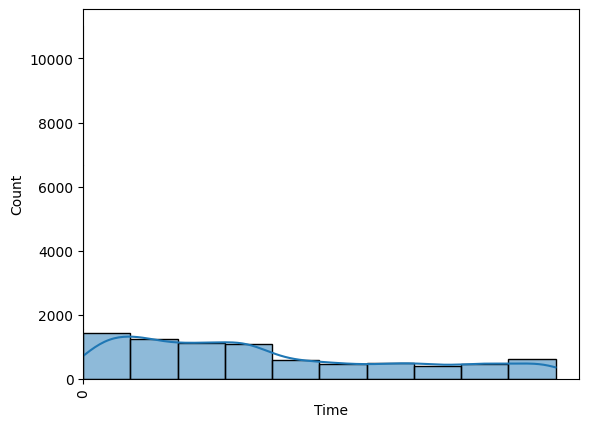

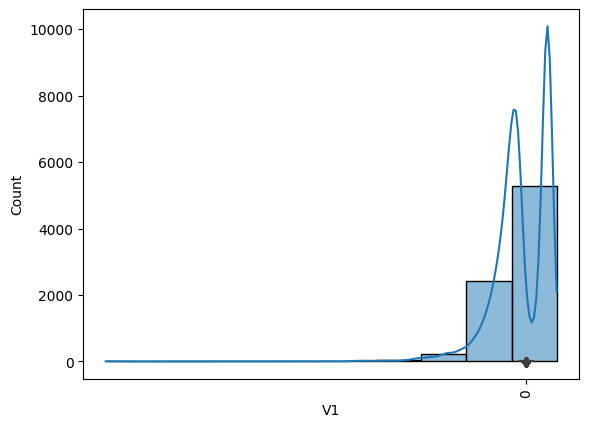

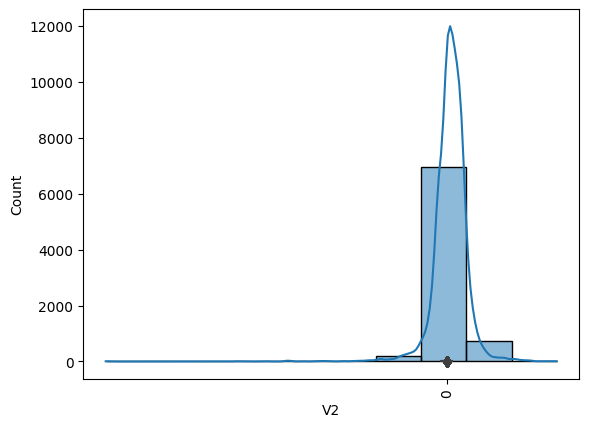

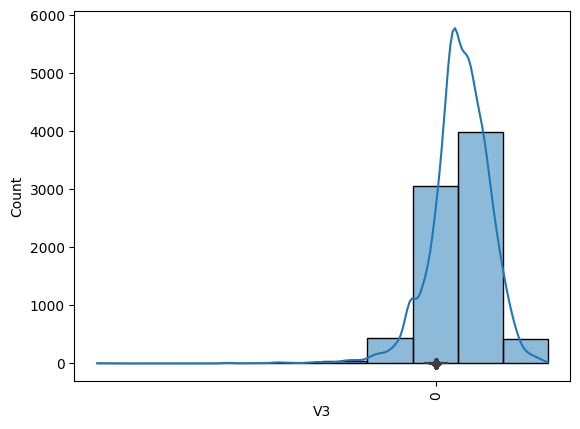

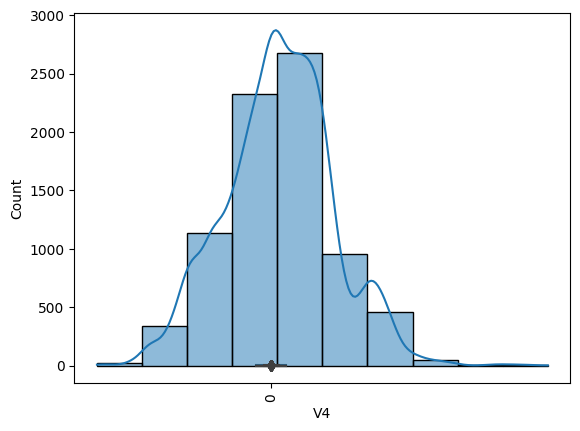

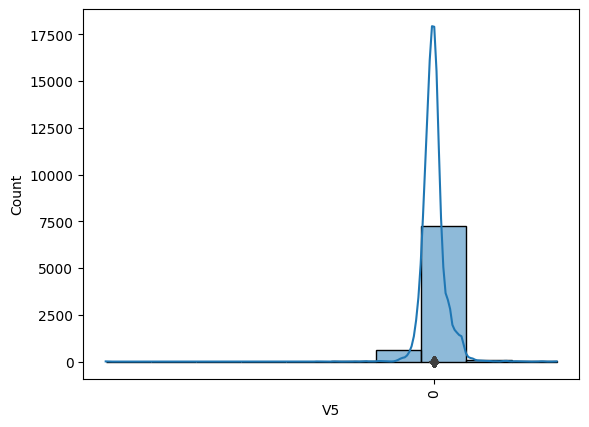

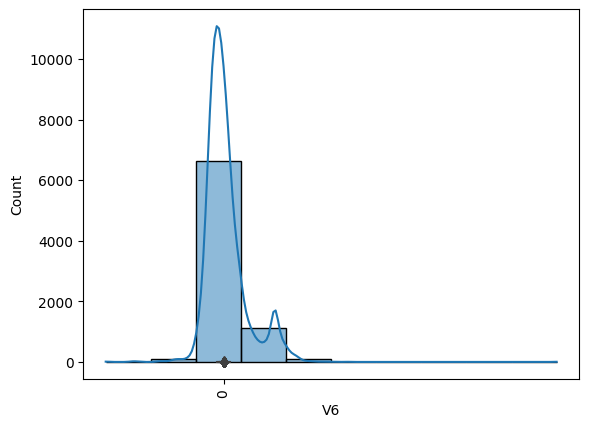

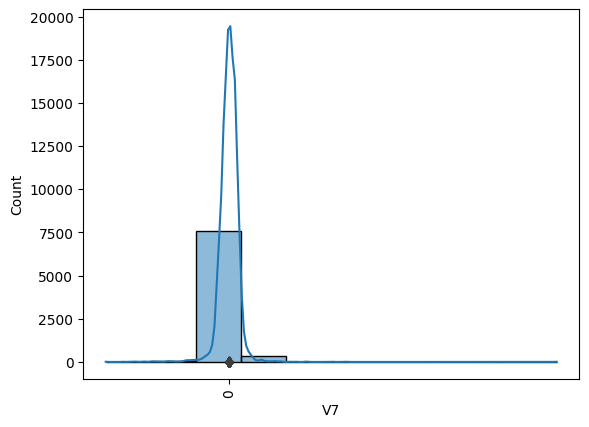

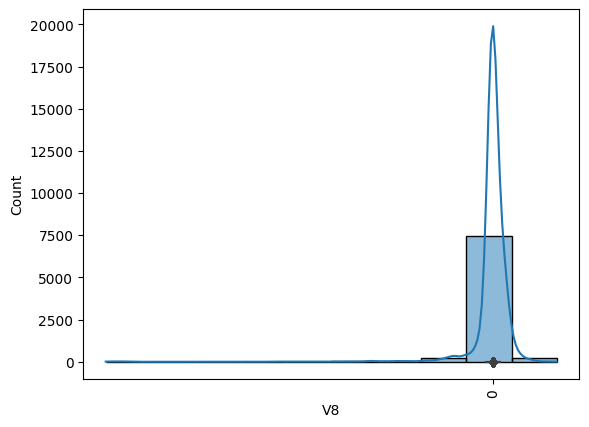

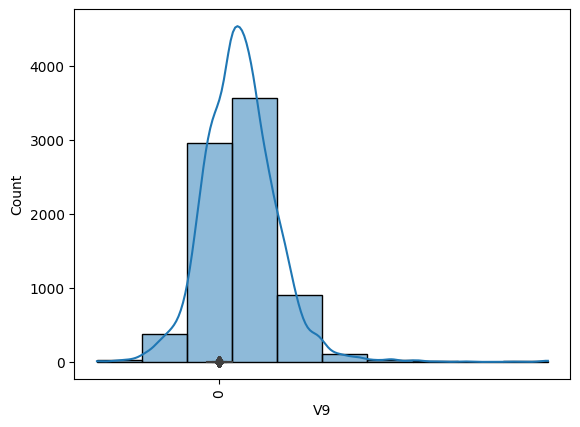

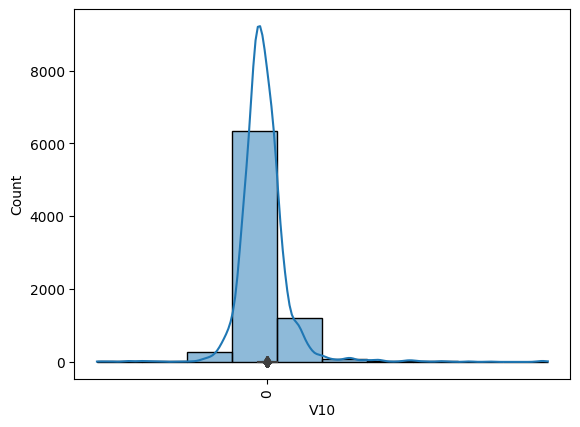

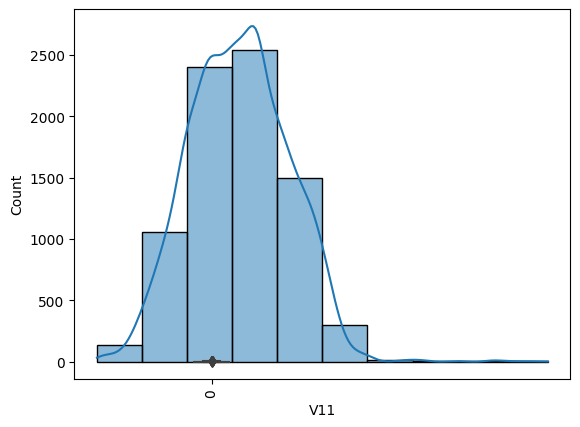

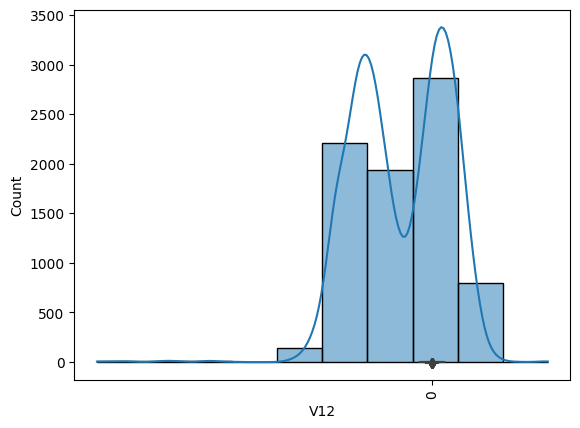

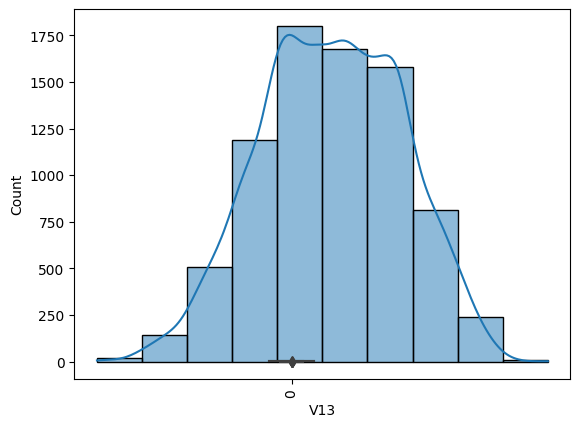

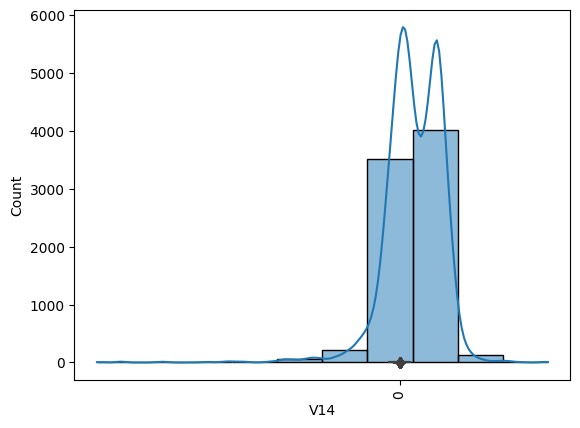

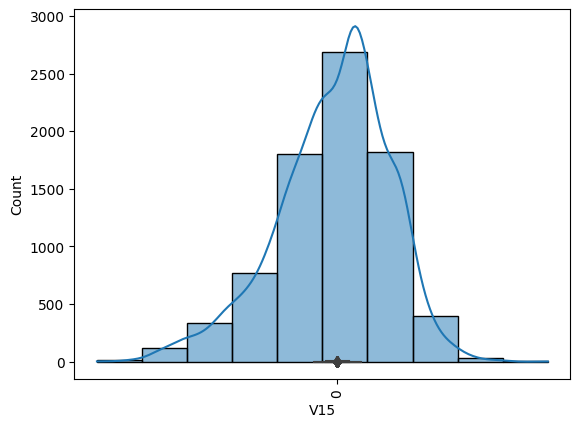

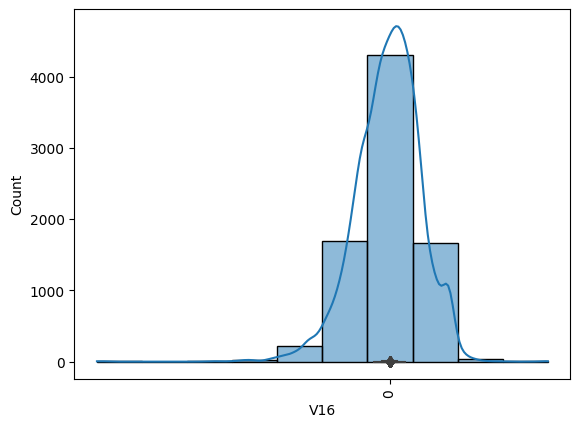

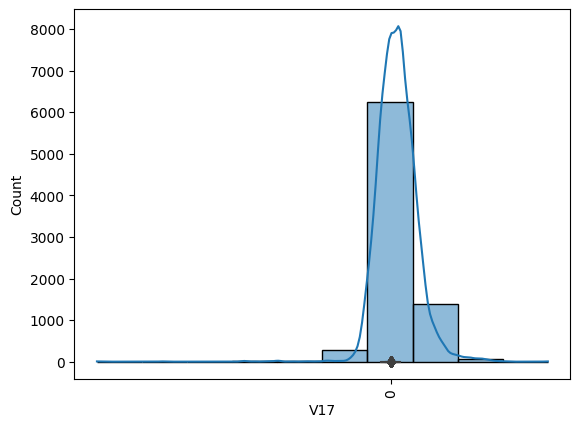

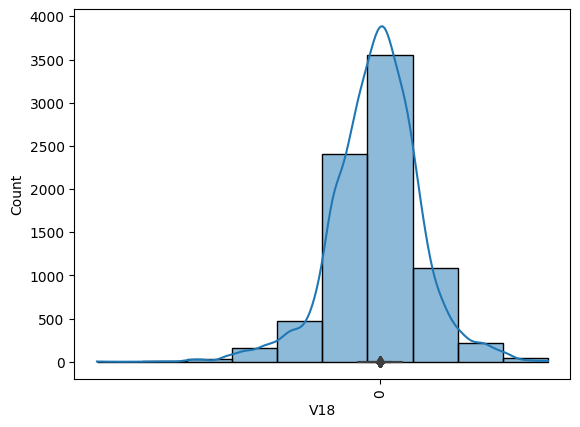

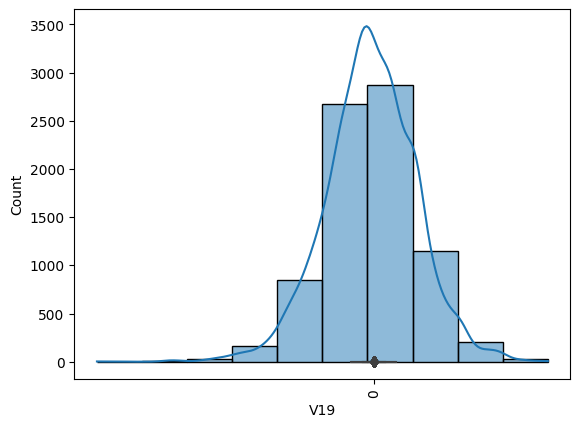

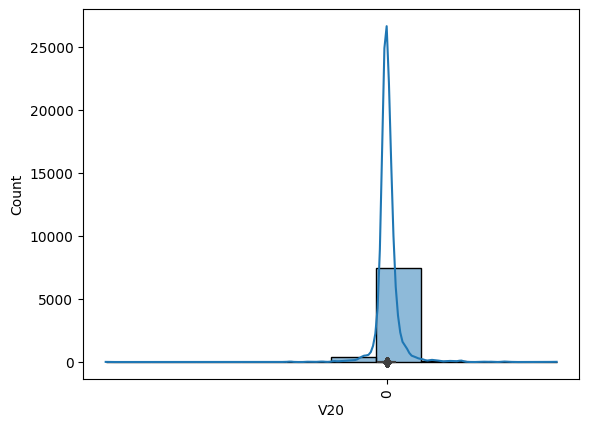

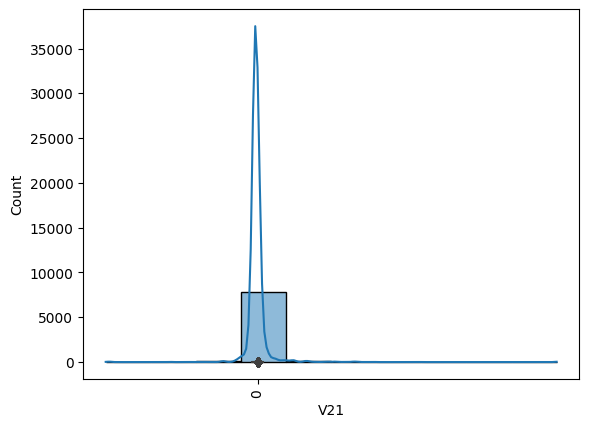

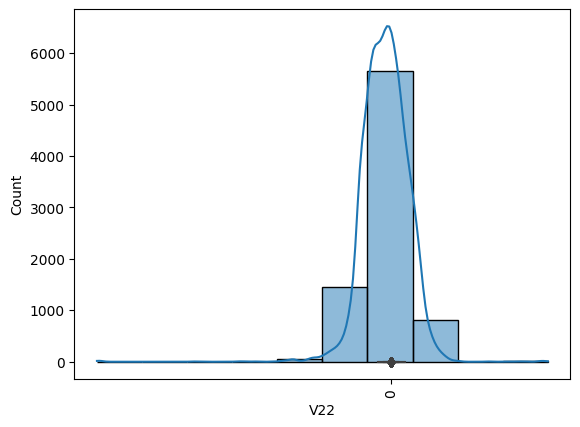

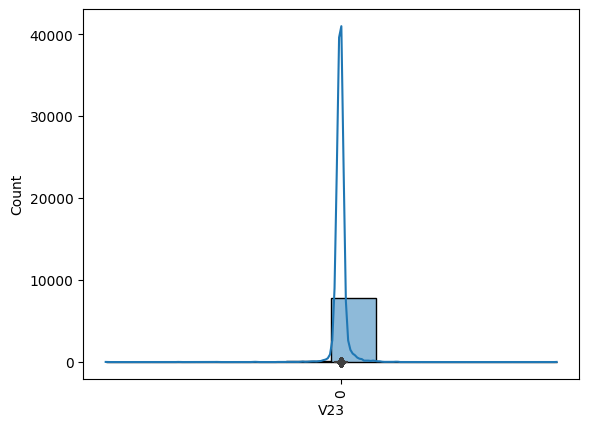

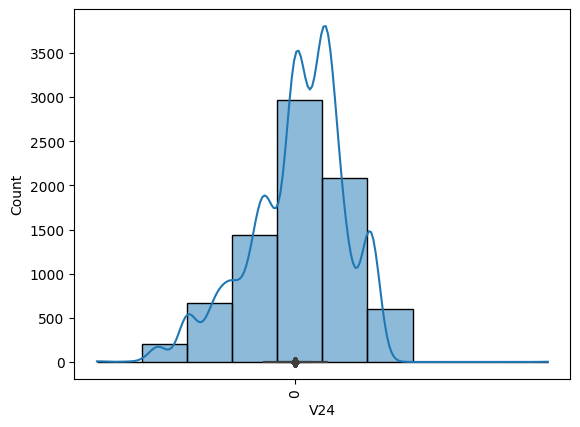

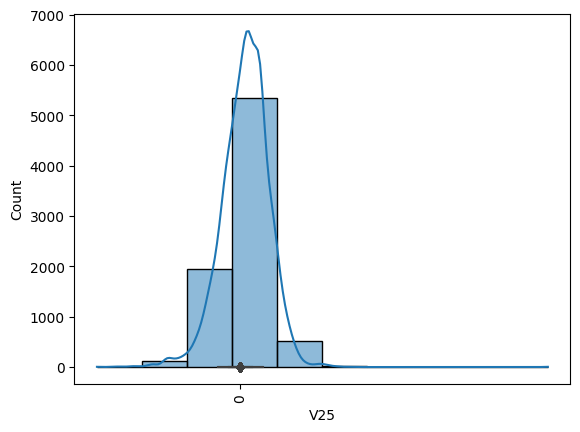

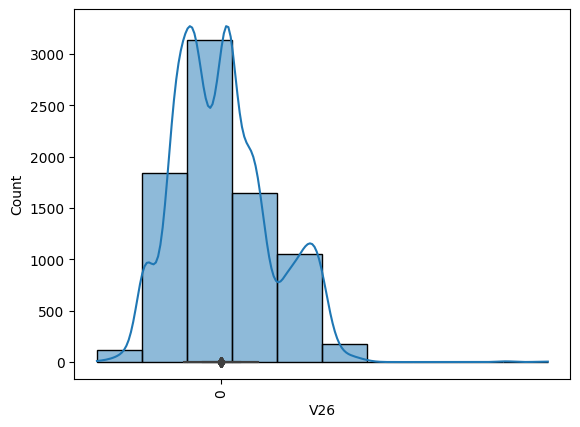

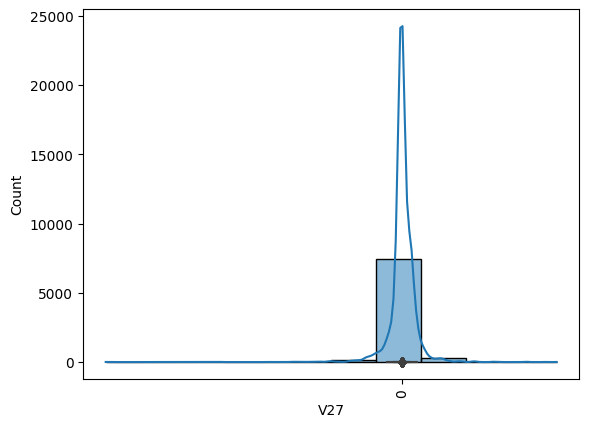

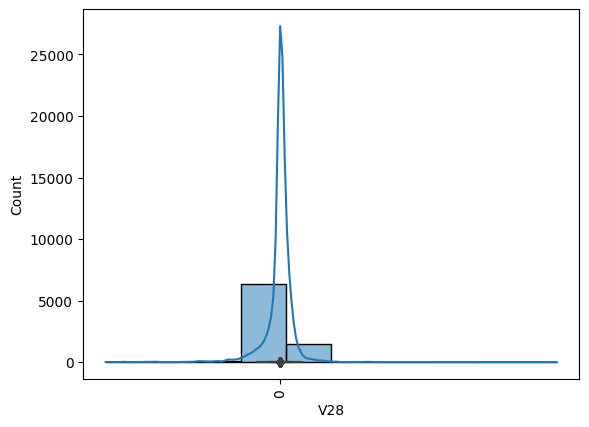

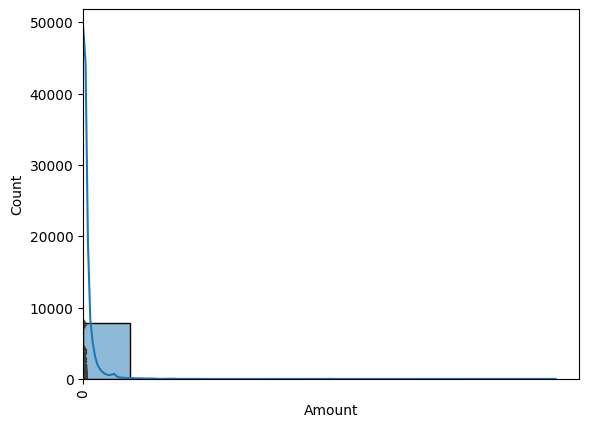

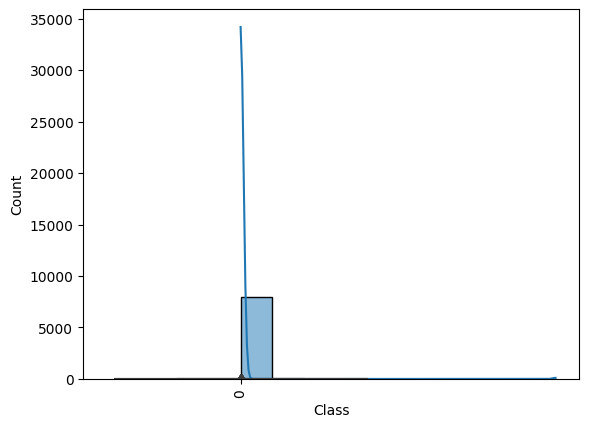

In [ ]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    ax=sns.boxplot(df[i])
    ax=sns.histplot(df[i],bins=10,kde=True)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90) 

In [ ]:
## Time,V1,V2,V3,V4,V24,V25,V26,V27,V28,Amount and Class are not normally distributed

11. List down columns that are highly skewed.

In [26]:
skew = df.skew(axis=0)
s = skew[skew>1] + skew[skew<-1]
s = s.index

Index(['Amount', 'Class', 'V1', 'V10', 'V12', 'V14', 'V16', 'V17', 'V2', 'V20',
       'V21', 'V23', 'V27', 'V28', 'V3', 'V5', 'V6', 'V7', 'V8'],
      dtype='object')

In [ ]:

##V8 and V23 are highly negatively skewed
##V28 ,class and Amount are hihly positively skewed

12. With the help of a standard scaler, normalize the respective column
distribution.


In [31]:
df_new = df[['Amount', 'Class', 'V1', 'V10', 'V12', 'V14', 'V16', 'V17', 'V2', 'V20',
       'V21', 'V23', 'V27', 'V28', 'V3', 'V5', 'V6', 'V7', 'V8']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_new)
df_normalized = pd.DataFrame(df_normalized, columns=df_new.columns)
df_normalized

,Amount,Class,V1,V10,V12,V14,V16,V17,V2,V20,V21,V23,V27,V28,V3,V5,V6,V7,V8
0,0.244964,-0.041599,-0.694242,0.083386,-0.618296,-0.324610,-0.536833,0.244863,-0.044075,0.326118,-0.024923,-0.176911,0.330892,-0.063781,1.672773,-0.245117,0.347068,0.193679,0.082637
1,-0.342475,-0.041599,0.608496,-0.153350,1.066089,-0.149982,0.529434,-0.135170,0.161176,-0.089611,-0.307377,0.162201,-0.022256,0.044608,0.109797,0.043483,-0.061820,-0.063700,0.071253
2,1.160686,-0.041599,-0.693500,0.190700,0.066137,-0.173114,-3.298235,1.306868,-0.811578,0.680975,0.337632,1.456320,-0.137137,-0.181021,1.169468,-0.364572,1.351454,0.639776,0.207373
3,0.140534,-0.041599,-0.493325,-0.050468,0.178371,-0.300360,-1.209296,-0.805445,-0.112169,-0.269855,-0.147443,-0.304777,0.155396,0.186189,1.182516,-0.007469,0.936150,0.192071,0.316018
4,-0.073403,-0.041599,-0.591330,0.691625,0.538627,-1.168034,-0.515205,-0.279081,0.531541,0.529939,-0.012839,-0.220123,0.543620,0.651816,1.021412,-0.295015,0.071999,0.479302,-0.226510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-0.350151,-0.041599,-6.065842,4.000715,2.714113,4.826801,1.264067,2.344999,6.099286,1.914365,0.290602,1.624574,2.337901,2.495529,-6.486245,-3.886611,-1.956690,-3.975628,6.116573
284803,-0.254117,-0.041599,-0.374121,-0.896292,0.916535,-0.704305,-0.812275,-0.030251,-0.033356,0.077330,0.291625,0.019958,0.169641,-0.162164,1.342145,0.629040,0.794446,0.019667,0.246886
284804,-0.081839,-0.041599,0.980024,-0.445225,0.063169,-0.532657,0.160589,0.369114,-0.182434,0.001811,0.315913,-0.060053,0.011037,-0.080467,-2.143205,1.905833,2.275262,-0.239939,0.593140
284805,-0.313249,-0.041599,-0.122755,-0.366558,-0.963657,0.469046,-0.694523,0.600385,0.321250,0.165300,0.361112,-0.261503,0.269604,0.316687,0.463320,-0.273836,0.468155,-0.554672,0.568631


13. List down columns that have high kurtosis.

In [ ]:
stats.kurtosis(df,axis=0,fisher=True,bias=True)


array([ -0.80327958,  10.45337971,  37.03524676,   7.30620352,
         0.37510725,  79.96175761,  10.64767397, 154.67990349,
       141.63800518,   5.06580757,  25.81910218,   0.77629596,
         0.68353838,  -0.48755987,  14.75822597,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan])

14. What is the distribution of Time and Amount columns in the dataset ?

<ipython-input-41-4f4e4520e840>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'])


<Axes: xlabel='Time', ylabel='Density'>

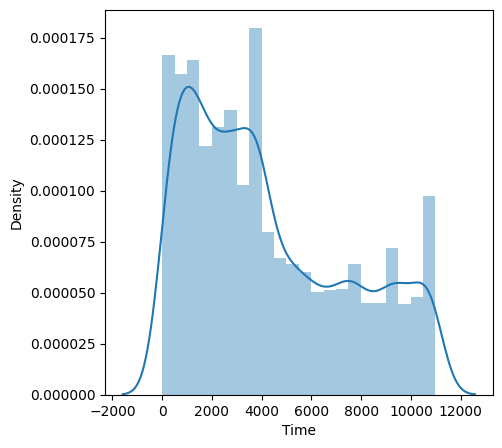

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(df['Time'])

<ipython-input-42-60147507550b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'])


<Axes: xlabel='Amount', ylabel='Density'>

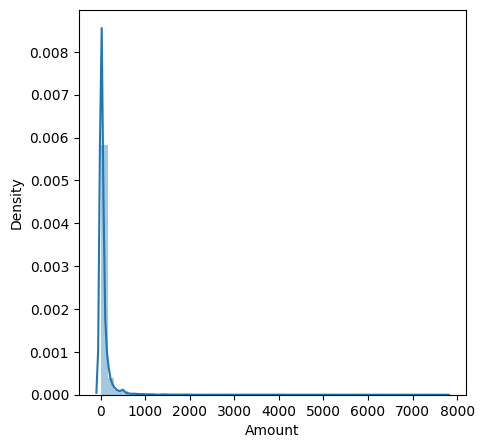

In [ ]:
plt.figure(figsize=(5,5))
sns.distplot(df['Amount'])

15. Find the distribution of all variables with respect to the outcome ‘Class’
variable.

<ipython-input-43-cdaf90606aed>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(7,4,i)
<ipython-input-43-cdaf90606aed>:17: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t0[feature], bw=0.5,label="Class = 0", color='b')
<ipython-input-43-cdaf90606aed>:18: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t1[feature], bw=0.5,label="Class = 1", color='r')
<ipython-input-43-cdaf90606aed>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecate

<Figure size 640x480 with 0 Axes>

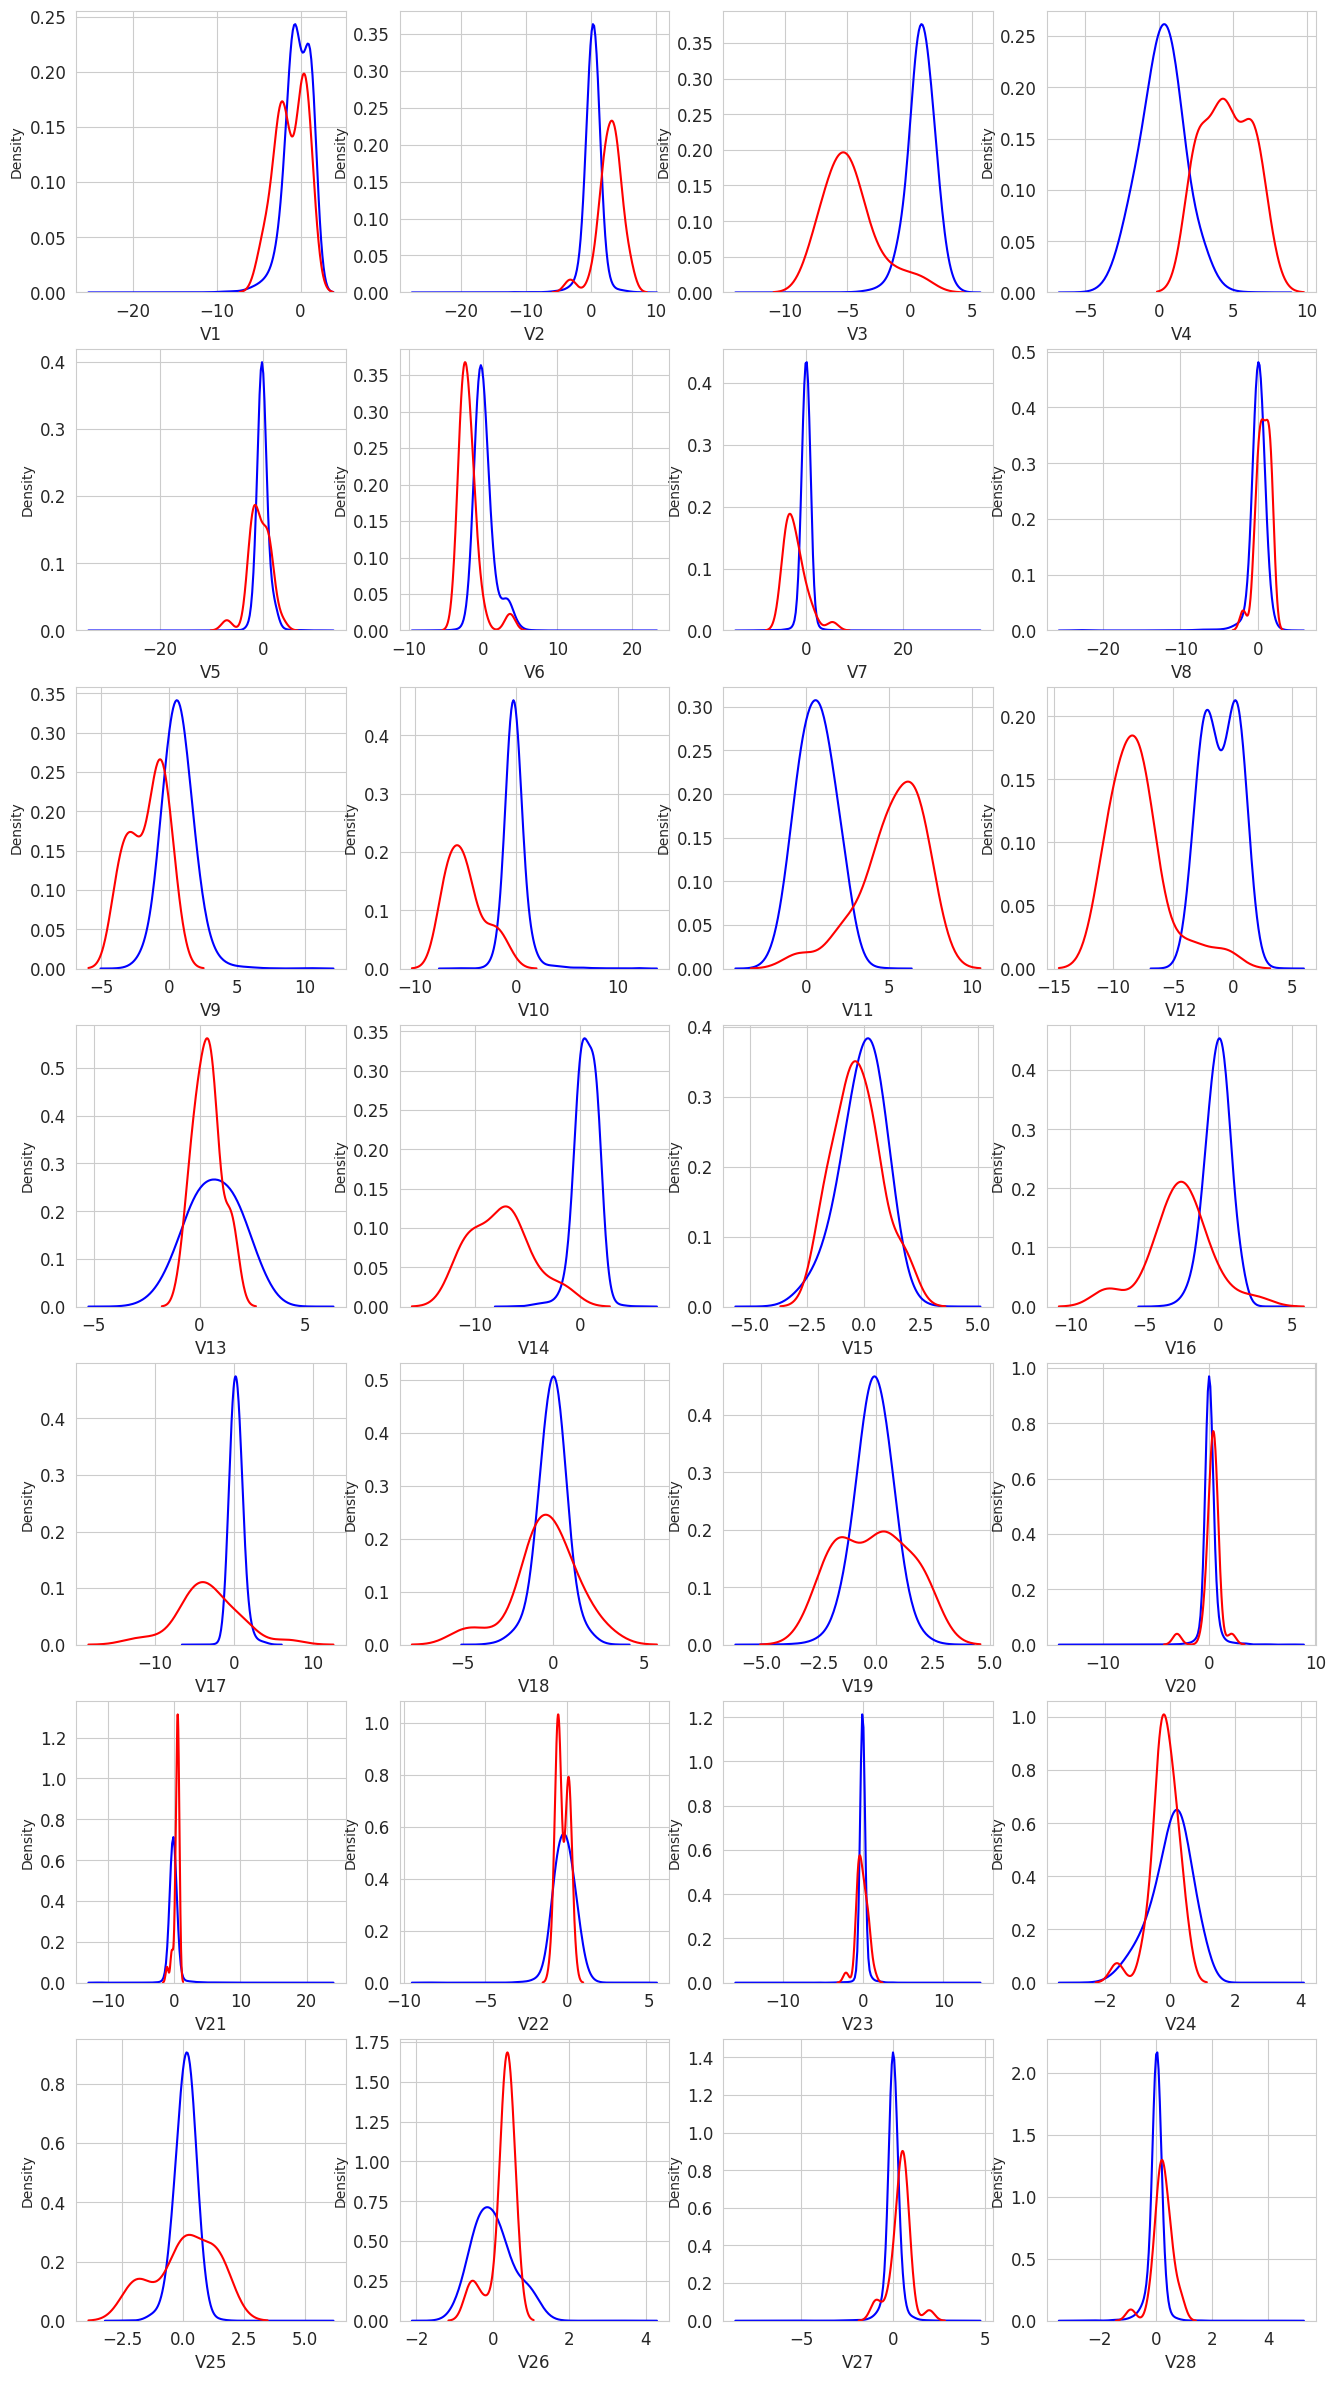

In [ ]:
col = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28']

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,30))

for feature in col:
    i += 1
    plt.subplot(7,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0", color='b')
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1", color='r')
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

16. Create a countplot for the outcome class in seaborn using percentage
instead of count for each bar.

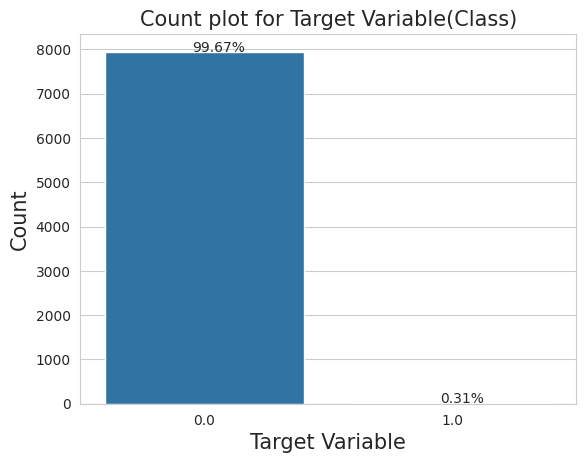

In [ ]:
# consider only the target variable
df_target = df['Class'].copy()

# get counts of 0's and 1's in the 'Chance of Admit' variable
df_target.value_counts()

# plot the countplot of the variable 'Chance of Admit'
sns.countplot(x = df_target)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count plot for Target Variable(Class)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

17. Plot a heatmap for correlation matrix for the given dataset. Write the
Observation. Especially note down columns that are highly correlated
(Positive and Negative Correlation, Consider 0.7 to 1 as high).


<Axes: >

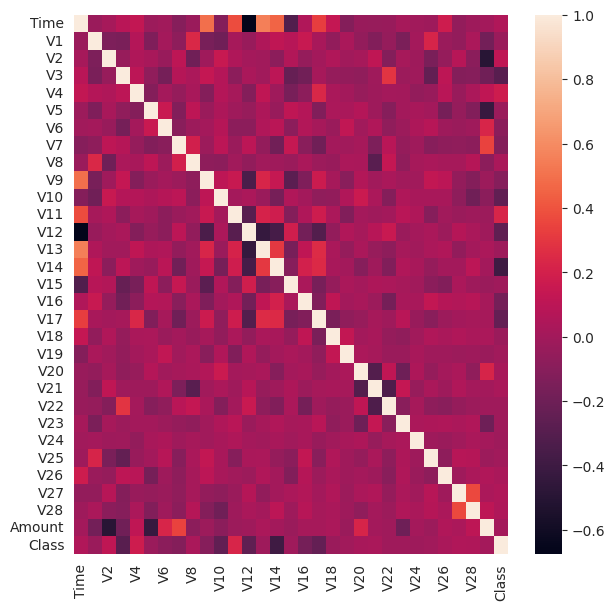

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=False)

The heat-map above indicates that there are no high correlation values among the predictor columns. No predictor column has a high correlation value with the Class column either. However there exists a negative correlation among V2 and Amount as well as a positive correlation among V7 and the Amount feature

18. With the help of hypothesis testing check whether fraudulent transactions 
of higher value than normal transactions? 

Ans:

If fraudulent transactions are in general of higher value than normal transactions or not. To check this lets do a hypothesis test. Lets define our Null and Alternative hypothesis.

H0 : Fraudulent transactions are of similar or higher value as normal transactions

HA : Fraudulent transactions are of lower value as normal transactions

For the hypothesis test I will be performing a Z-test, with the valid transactions acting as the population. Though a T-test can also be performed but given that our sample set (fraudulent transactions) is of size 492 there shouldn't be any difference, as for sample set >= 30 the t distribution and z distribution are nearly the same.

We will be performing the test for 99% significance level, this means that we should get a z-score of atleast 2.58 or higher. formula for z-score, z−score=(x¯−μ)/S.D

Where

x¯ : mean of the sample μ : population mean S.D : Standard deviation of sampling diatribution The standard deviation of sampling distribution in our case is given by the formula : σ/√n , where σ is the Standard deviation of the population and n is the sample size

In [ ]:
data1=df.copy()
population = data1[data1['Class'] == 0].Amount
sample = data1[data1['Class'] == 1].Amount
sampleMean = sample.mean()
populationStd = population.std()
populationMean = population.mean()
z_score = (sampleMean - populationMean) / (populationStd / sample.size ** 0.5)
print("Z Score= ",z_score)

Z Score=  1.0566176922401334


As the z-score is more than 2.58 we reject the Null hypothesis. So there is a 99% chance that the amount spend on fraudulent transactions are on average significantly lower than normal

19. Perform ANOVA test for Statistical feature selection.

In [45]:
from sklearn.feature_selection import f_classif


# split the dataframe into features and target
X = df.drop('Class', axis=1)
y = df['Class']

# perform ANOVA test for feature selection
f_values, p_values = f_classif(X, y)

# create a dataframe with the feature scores
df_scores = pd.DataFrame({'feature': X.columns, 'f_value': f_values, 'p_value': p_values})

# sort the dataframe by f_value in descending order
df_scores = df_scores.sort_values(by='f_value', ascending=False)

# print the feature scores
print(df_scores[df_scores['p_value']<0.05])

   feature       f_value        p_value
17     V17  33979.168593   0.000000e+00
14     V14  28695.547788   0.000000e+00
12     V12  20749.822361   0.000000e+00
10     V10  14057.979985   0.000000e+00
16     V16  11443.349428   0.000000e+00
3       V3  11014.508305   0.000000e+00
7       V7  10349.605408   0.000000e+00
11     V11   6999.355047   0.000000e+00
4       V4   5163.832114   0.000000e+00
18     V18   3584.380605   0.000000e+00
1       V1   2955.668946   0.000000e+00
9       V9   2746.600273   0.000000e+00
5       V5   2592.357929   0.000000e+00
2       V2   2393.401678   0.000000e+00
6       V6    543.510578  4.213111e-120
21     V21    465.916251  3.002269e-103
19     V19    344.990997   5.801517e-77
20     V20    114.999731   7.964292e-27
8       V8    112.548287   2.740673e-26
27     V27     88.045296   6.441920e-21
0     Time     43.252998   4.818269e-11
28     V28     25.901405   3.595354e-07
24     V24     14.850932   1.163760e-04
29  Amount      9.033345   2.651221e-03


In [ ]:
X.shape

(7973, 30)

In [ ]:
y.shape

In [ ]:
scaler = MinMaxScaler()

# Applying SelectKBest class to extract top 15 best features
fs = SelectKBest(score_func=f_regression,k=15)
# Applying feature selection
fit = fs.fit(X,y)

In [ ]:
features_score = pd.DataFrame(fit.scores_)
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(15,columns="F_Score"))

20. Split the dataset randomly into train and test datasets. Use a train -testratio 
of 70:30 ratio

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
X=df.drop('Class',axis=1)
y=df['Class'].astype(int)

21. These are just checkpoints. Please use your best analytical approach to build this report. You can mix match columns to create new ones which can be 7 used for better analysis. Create your own features if required. Be highly
experimental and analytical here to find hidden patterns. You can use the
following as checklist pointers :